# Food 101 - Students in Atlanta

## Introduction

Metro Atlanta is the busiest metro area in Georgia and the ninth-largest metropolitan area in the United States. It is the home to nearly 6 millions people and more than 150,000 businesses, including The Home Depot, Coca-Cola, Delta Air Lines, and UPS. Other than the businesses, Atlanta also has many amazing dining places -- Thai, Korean, Chinese, Mexican, Pizza, Italian food, any type of food. They are distributed everywhere waiting for you to explore.

For a student in Atlanta, picking a place to live is not that easy since there are many things to consider. The neighborhood, the commute time, and safety are always on the top of the student's list. However, one thing is missing from the list but is vital for the quality of life: Food. Many students, especially international students, do not have a car when they are new to this area, so they have to spend more time and money on a meal. 

In this project, I will explore the restaurants in each city around metro Atlanta to help students choose the most 'delicious' place to live.

## Data collection and data cleaning

Two types of data are needed to construct this project: 

1. The list of cities in Metro Atlanta to locate the cities and to search the venues around cities.
   
2. The restaurant information, including names, categories, latitude, and longitude, to summerize the venues in each city and check the distribution of venues

I start from scraping the list from the [website](https://support.crunchbase.com/hc/en-us/articles/360009896314-What-cities-are-in-the-Greater-Atlanta-Area-region-).

In [24]:
from bs4 import BeautifulSoup     # Scraping
import requests 

In [217]:
# Get the HTML file
url = 'https://support.crunchbase.com/hc/en-us/articles/360009896314-What-cities-are-in-the-Greater-Atlanta-Area-region-'
web = requests.get(url).text

In [421]:
soup = BeautifulSoup(web)
loc2 = soup.find('section', class_ = 'article-info')
contents = loc2.text

In [422]:
contents

'\n\nRegions are composed by surrounding states, countries, counties, or cities. All regions may change in the future.\nHere’s the current breakdown of the Greater Atlanta Area region:\n\nAtlanta\nAlpharetta\nNorcross\nMarietta\nDuluth\nRoswell\nKennesaw\nLawrenceville\nSuwanee\nDecatur\nCumming\nSmyrna\nBuford\nTucker\nWoodstock\nDallas\nCarrollton\nStone Mountain\nDunwoody\nStockbridge\nPeachtree City\nMorrow\nConyers\nCanton\nJonesboro\nCartersville\nDouglasville\nLilburn\nAcworth\nCovington\nJasper\nRiverdale\nSugar Hill\nNewnan\nGriffin\nWinder\nForest Park\nHiram\nLoganville\nClarkston\nLithonia\nAvondale Estates\nDacula\nAustell\nFayetteville\nBarnesville\nManchester\nPowder Springs\nCollege Park\nVinings\nTyrone\nMableton\nBowdon\nOxford\nStatham\nWaleska\nTate\nRex\nBall Ground\nMilner\nBuckhead\nHolly Springs\nPalmetto\nSharpsburg\nEmerson\nNewborn\nWhite\nSocial Circle\nMeansville\nNorth Metro\nBostwick\nKingston\nJersey\nTalking Rock\nClarkdale\nFranklin\nTurin\nRoopville\n

In [423]:
contents = contents.split('\n')
city = contents[5:-8]

In [424]:
city

['Atlanta',
 'Alpharetta',
 'Norcross',
 'Marietta',
 'Duluth',
 'Roswell',
 'Kennesaw',
 'Lawrenceville',
 'Suwanee',
 'Decatur',
 'Cumming',
 'Smyrna',
 'Buford',
 'Tucker',
 'Woodstock',
 'Dallas',
 'Carrollton',
 'Stone Mountain',
 'Dunwoody',
 'Stockbridge',
 'Peachtree City',
 'Morrow',
 'Conyers',
 'Canton',
 'Jonesboro',
 'Cartersville',
 'Douglasville',
 'Lilburn',
 'Acworth',
 'Covington',
 'Jasper',
 'Riverdale',
 'Sugar Hill',
 'Newnan',
 'Griffin',
 'Winder',
 'Forest Park',
 'Hiram',
 'Loganville',
 'Clarkston',
 'Lithonia',
 'Avondale Estates',
 'Dacula',
 'Austell',
 'Fayetteville',
 'Barnesville',
 'Manchester',
 'Powder Springs',
 'College Park',
 'Vinings',
 'Tyrone',
 'Mableton',
 'Bowdon',
 'Oxford',
 'Statham',
 'Waleska',
 'Tate',
 'Rex',
 'Ball Ground',
 'Milner',
 'Buckhead',
 'Holly Springs',
 'Palmetto',
 'Sharpsburg',
 'Emerson',
 'Newborn',
 'White',
 'Social Circle',
 'Meansville',
 'North Metro',
 'Bostwick',
 'Kingston',
 'Jersey',
 'Talking Rock',
 'Cla

However, I found that two cities are missing from the list: **Doraville** and **Sandy Springs**, so I added these cities to the list manually.

In [426]:
city.append('Doraville')
city.append('Sandy Springs')
city

['Atlanta',
 'Alpharetta',
 'Norcross',
 'Marietta',
 'Duluth',
 'Roswell',
 'Kennesaw',
 'Lawrenceville',
 'Suwanee',
 'Decatur',
 'Cumming',
 'Smyrna',
 'Buford',
 'Tucker',
 'Woodstock',
 'Dallas',
 'Carrollton',
 'Stone Mountain',
 'Dunwoody',
 'Stockbridge',
 'Peachtree City',
 'Morrow',
 'Conyers',
 'Canton',
 'Jonesboro',
 'Cartersville',
 'Douglasville',
 'Lilburn',
 'Acworth',
 'Covington',
 'Jasper',
 'Riverdale',
 'Sugar Hill',
 'Newnan',
 'Griffin',
 'Winder',
 'Forest Park',
 'Hiram',
 'Loganville',
 'Clarkston',
 'Lithonia',
 'Avondale Estates',
 'Dacula',
 'Austell',
 'Fayetteville',
 'Barnesville',
 'Manchester',
 'Powder Springs',
 'College Park',
 'Vinings',
 'Tyrone',
 'Mableton',
 'Bowdon',
 'Oxford',
 'Statham',
 'Waleska',
 'Tate',
 'Rex',
 'Ball Ground',
 'Milner',
 'Buckhead',
 'Holly Springs',
 'Palmetto',
 'Sharpsburg',
 'Emerson',
 'Newborn',
 'White',
 'Social Circle',
 'Meansville',
 'North Metro',
 'Bostwick',
 'Kingston',
 'Jersey',
 'Talking Rock',
 'Cla

In [427]:
city_all = [city[i] +', GA' for i in range(len(city))]

In [428]:
len(city)

147

I obtained 145 city names from the website and added the other two cities into the list, so I had 147 cities in total in Metro Atlanta.

Next, we have to get the **geograpical coordinate** of each city.

In [26]:
from geopy.geocoders import Nominatim
import pandas as pd

In [256]:
lat = []
lng = []
for i in range(len(city_all)):
    geolocator = Nominatim(user_agent='atl_explore')
    location = geolocator.geocode(city_all[i])
    lat.append(location.latitude)
    lng.append(location.longitude)

In [357]:
df = pd.DataFrame({'City':city, 'Latitude': lat, 'Longitude': lng})

In [358]:
df.index = city
df.drop('City', axis = 1, inplace = True)
df.drop('Atlanta', axis = 0 ,inplace = True)  # downtown Atlanta is not in the consideration

In [434]:
print(df.shape)
df.head()

(146, 2)


,Latitude,Longitude
Alpharetta,34.070958,-84.274733
Norcross,33.941213,-84.213531
Marietta,33.952847,-84.549615
Duluth,34.002857,-84.144105
Roswell,34.023320,-84.360022


I remove downtown Atlanta from the list because it's not the best choice for students due to safety concern.

Now let's mark these cities on the map.

In [356]:
# latitude and longitude of ATL
geolocator = Nominatim(user_agent='atl_explore')
location = geolocator.geocode('Atlanta, GA')
lat_atl = location.latitude
lng_atl = location.longitude
# map 
map_city = folium.Map(location=[lat_atl, lng_atl], zoom_start=8)
for lat, lng in zip(df['Latitude'], df['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)      
map_city

My purpose is to find out the most 'delicious' city for students to live in Metro Atlanta. To save students' commute time, I limited the cities within 25 miles from the center of Atlanta.

Here I used `geodesic` to calculate the distance from downtown to each city and removed cities that are far away from the center.

In [358]:
from geopy.distance import geodesic
dis = []
for i in range(df.shape[0]):
    dis.append(geodesic((lat_atl,lng_atl), (df['Latitude'][i], df['Longitude'][i])).miles)

In [359]:
df['Distance'] = dis
df.head()

,Latitude,Longitude,Distance
Alpharetta,34.070958,-84.274733,23.154331
Norcross,33.941213,-84.213531,16.689273
Marietta,33.952847,-84.549615,16.770625
Duluth,34.002857,-84.144105,22.494879
Roswell,34.023320,-84.360022,18.979432


In [365]:
def color_producer(dis):
    if dis < 25:
        return 'red'
    else:
        return 'blue'
map_city = folium.Map(location=[lat_atl, lng_atl], zoom_start=8)

for lat, lng, dis in zip(df['Latitude'], df['Longitude'], df['Distance']):
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        color=color_producer(dis),
        fill=True,
        fill_color=color_producer(dis),
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

In [457]:
df_nearby = df[df['Distance'] < 25]

In [458]:
print(df_nearby.shape)
df_nearby.head()

(48, 3)


,Latitude,Longitude,Distance
Alpharetta,34.070958,-84.274733,23.154331
Norcross,33.941213,-84.213531,16.689273
Marietta,33.952847,-84.549615,16.770625
Duluth,34.002857,-84.144105,22.494879
Roswell,34.023320,-84.360022,18.979432


I got 48 cities around Metro Atlanta.

Next, I used **Foursquare API** to obtain venues in each city.

In [74]:
import requests
from pandas.io.json import json_normalize 

In [187]:
# account information
CLIENT_ID = 'KGL3AWGZJOTUDQJ1OH03XE3XJD1YAYJVS55Y5EW14IM4DCDO' 
CLIENT_SECRET = 'X3NKM45152MTWIGHWNPJUYZKUVEKBWOM3VJCEZ0VX4RD4DAA' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KGL3AWGZJOTUDQJ1OH03XE3XJD1YAYJVS55Y5EW14IM4DCDO
CLIENT_SECRET:X3NKM45152MTWIGHWNPJUYZKUVEKBWOM3VJCEZ0VX4RD4DAA


In [463]:
# define a function to obatin nearby venues
def get_venues(city_name):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, df['Latitude'][city_name], df['Longitude'][city_name], 1000, 100)
    result = requests.get(url).json()
    venue = result['response']['groups'][0]['items'] 
    try:
        venue_city = json_normalize(venue).loc[:,['venue.name', 'venue.categories', 'venue.location.city', 'venue.location.lat', 'venue.location.lng']]
        venue_city.columns = ['Name', 'Categories', 'City', 'Latitude', 'Longitude']
        for i in range(venue_city.shape[0]):
            venue_city['Categories'][i]= venue_city['Categories'][i][0]['name']
        return(venue_city)
    except:
        pass   

In [464]:
city_new = df_nearby.index
venue_all = pd.DataFrame(columns = ['Name', 'Categories', 'City', 'Latitude', 'Longitude'])
for c in city_new:
    venue = get_venues(c)
    venue_all = venue_all.append(venue, ignore_index = True)
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [465]:
# check missing values
venue_all.isnull().sum()

Name           0
Categories     0
City          12
Latitude       0
Longitude      0
dtype: int64

In [468]:
# drop NA and duplicates
venue_all.dropna(inplace = True)
venue_all.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

In [469]:
venue_all.shape

(1466, 5)

I selected 48 from 146 cities and totally obtained 1466 venues in total in Metro Atlanta. 

## Data Exploratory

Let's first check the distribution of these 1466 venues.

In [366]:
venue_all.groupby('City').count()

,Name,Categories,Latitude,Longitude,NS
City,,,,,
Acworth,1,1,1,1,1
Alpharetta,65,65,65,65,65
Atlanta,212,212,212,212,212
Atlanta-Decatur,1,1,1,1,1
Austell,19,19,19,19,19
Avondale Estates,22,22,22,22,22
Brentwood,2,2,2,2,2
Chamblee,57,57,57,57,57
Chamblee-Doraville,1,1,1,1,1


I found that many cities has less than 10 venues and some cities has more than 30 venues. Considering the diversity of restaurant, I only chose the first 25 cities to dive in.

In [304]:
top25 = venue_all.groupby('City')['Name'].count().sort_values(ascending = False).index[1:26]

In [305]:
df_25 = df_nearby.loc[top25,:]
df_25['Venues'] = venue_all.groupby('City')['Name'].count().sort_values(ascending = False)[1:26]
df_25.head()

,Latitude,Longitude,Distance,Venues
City,,,,
Decatur,33.774867,-84.295990,5.705754,161
Roswell,34.023320,-84.360022,18.979432,65
Alpharetta,34.070958,-84.274733,23.154331,65
Chamblee,33.892176,-84.298830,11.174098,57
Marietta,33.952847,-84.549615,16.770625,57


In [372]:
def color_producer(number):
    if number >= 100:
        return 'red'
    elif number >= 50:
        return 'green'
    else:
        return 'blue'
map_25 = folium.Map(location = [lat_atl, lng_atl], zoom_start = 10)
for lat, lng, venue in zip(df_25['Latitude'], df_25['Longitude'], df_25['Venues']):
    folium.CircleMarker(
    [lat, lng],
    radius = 20,
    color = color_producer(venue),
    fill_color = color_producer(venue),
    fill_opacity = 0.5 ).add_to(map_25)
map_25

The <span style="color:red">red circle<span> <span style="color:black">denotes the city having more than `100` venue. Cities with more than `50` but less than `100` venues are marked by<span> <span style="color:green">green circles<span>. <span style="color:black">Those having less than 50 venues are marked by <span> <span style="color:blue">blue circles<span>.<span style="color:black">

In general, I found that there are more cities and venues in north Atlanta than the south. In the other words, living in the north comes with more nearby cities to visit and more restarants to explore. Therefore, I narrowed down the targets: I only consider the cities in north Atlanta.

In [307]:
index_south = (df_25['Latitude'] < lat_atl)
df_north = df_25[~index_south]
df_north.shape

(19, 4)

Now I can dive in these cities. First I listed the top 5 venues in each city.

In [308]:
# Drop south cities from restaurant list
keys = np.where(index_south == True)
south_city = df_25.index[keys]
for i in south_city:
    venue_north = venue_all.drop(venue_all[venue_all['City'] == i].index, axis = 0)
venue_north.reset_index(drop = True, inplace = True)

In [265]:
city_list = df_25.index[~index_south]
city_list

Index(['Decatur', 'Roswell', 'Alpharetta', 'Chamblee', 'Marietta',
       'Stone Mountain', 'Snellville', 'Sandy Springs', 'Tucker', 'Dunwoody',
       'Smyrna', 'Mableton', 'Kennesaw', 'Duluth', 'Powder Springs',
       'Avondale Estates', 'Norcross', 'Lilburn', 'Douglasville'],
      dtype='object', name='City')

In [309]:
# Get dummy
dummy = pd.get_dummies(venue_north['Categories'])
dummy['City'] = venue_north['City']

In [310]:
# sum of dummy
group_sum = dummy.groupby('City').sum()
group_sum=group_sum.reset_index()
group_sum

,City,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Acworth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alpharetta,0,0,4,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2,0
2,Atlanta,0,1,7,1,1,0,0,0,1,...,1,0,1,1,0,1,0,1,2,2
3,Atlanta-Decatur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Austell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Avondale Estates,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Chamblee,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,Chamblee-Doraville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Clarkston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
num_top_venues = 5

for c in city_list:
    print("----"+c+"----")
    temp = group_sum[group_sum['City'] == c].T.reset_index()
    temp.columns = ['venue','count']
    temp = temp.iloc[1:]
    print(temp.sort_values('count', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Decatur----
            venue count
0     Pizza Place     8
1     Coffee Shop     5
2  Sandwich Place     4
3       Gastropub     4
4             Spa     4


----Roswell----
                       venue count
0                Pizza Place     4
1        American Restaurant     3
2         Mexican Restaurant     3
3  Cajun / Creole Restaurant     2
4                  BBQ Joint     2


----Alpharetta----
                     venue count
0           Clothing Store     8
1      American Restaurant     4
2  New American Restaurant     4
3   Furniture / Home Store     3
4             Intersection     2


----Chamblee----
                    venue count
0  Furniture / Home Store     4
1      Chinese Restaurant     4
2          Sandwich Place     3
3       Martial Arts Dojo     2
4      Dim Sum Restaurant     2


----Marietta----
                 venue count
0  American Restaurant     3
1                 Park     3
2       Ice Cream Shop     2
3          Coffee Shop     2
4             Phar

Highlights:

1. Top 5 venues in **Roswell** are all restaurants!!!

2. **Sandy Springs** is a vegetarian-friendly place (3 vegan restaurants).

3. **Decatur** has many pizza places and coffee shops.

4. **Chamblee** is the hub of chinese restaurants. It has 4 Chinese restaurants and 2 dim sum restaurants.

5. **Alpharetta** has 8 American restaurants.

There are *249* types of venues in the list. Here I built up an interactive map to see the distribution of different types of venues.

In [311]:
print(len(venue_north['Categories'].unique()))
venue_north['Categories'].unique()

249


array(['Movie Theater', 'Ice Cream Shop', 'Pizza Place', 'Shopping Plaza',
       'Hotel', 'Electronics Store', 'American Restaurant',
       'Grocery Store', "Women's Store", 'Winery',
       'Middle Eastern Restaurant', 'New American Restaurant',
       'Taco Place', 'Plaza', 'Beer Bar', 'Furniture / Home Store',
       'Clothing Store', 'Burger Joint', 'Coffee Shop',
       'Sushi Restaurant', 'Fast Food Restaurant', 'Convenience Store',
       'Mediterranean Restaurant', 'Vietnamese Restaurant',
       'Kitchen Supply Store', 'Cycle Studio', 'Restaurant',
       'Italian Restaurant', 'Gas Station', 'Steakhouse', 'Café',
       'Tex-Mex Restaurant', 'Bagel Shop', 'Candy Store', 'Boutique',
       'Kids Store', 'Bank', 'Breakfast Spot', 'Mobile Phone Shop',
       'Poke Place', 'Intersection', 'IT Services',
       'Residential Building (Apartment / Condo)', 'Juice Bar',
       'Salad Place', 'Business Service', 'Cuban Restaurant', 'Gift Shop',
       'Park', 'Comfort Food Restaurant

In [318]:
def type_map(categories):
    food_type = venue_north[venue_north['Categories'] == categories]
    food_type
    map_type = folium.Map([lat_atl, lng_atl], zoom_start = 10)
    for lat, lng in zip(food_type['Latitude'], food_type['Longitude']):
        folium.CircleMarker([lat, lng],
                           color = 'blue',
                           fill_color = 'red',
                           fill_opacity = 0.7,
                           radius = 5).add_to(map_type)
    return(map_type)

In [319]:
type_map('Coffee Shop')

In [320]:
type_map('Mexican Restaurant')

In [321]:
type_map('Ice Cream Shop')

In [316]:
type_map('Chinese Restaurant')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [373]:
type_map('Pizza Place')

I found that the type of restaurants are diverse in Decatur, Roswell, Alpharetta, Duluth, Chamblee, and Sandy Springs. That means, whichever type of restaurant you want to try, you can always find at least one in these cities.

## Conclusion

Based on the modules, I got two insights:

**1. There are more venues in North Atlanta than south.**

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


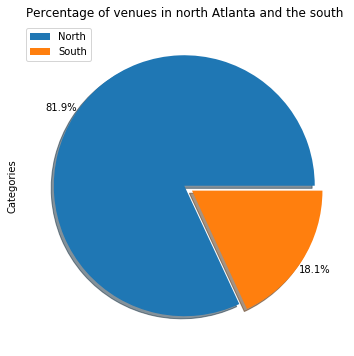

In [8]:
import matplotlib.pyplot as plt
for i in range(venue_all.shape[0]):
    if (venue_all['Latitude'][i] > lat_atl):
        venue_all['NS'][i] = 'N'
    else:
        venue_all['NS'][i] = 'S'
group_NS = venue_all.groupby('NS').count()
group_NS['Categories'].plot(kind = 'pie', figsize = (15,6), autopct='%1.1f%%',pctdistance=1.12, shadow=True, labels = None, explode= [0,0.07])
plt.title('Percentage of venues in north Atlanta and the south')
plt.legend(labels=['North', 'South'], loc='upper left') 

North Atlanta has three times more venues than the south. That is, living in the north is easier to access resaturants. 

**2. There are two hot spots: Decatur and the area surrounded by Roswell, Alpharetta, Duluth, Chamblee, and Sandy Springs.**


In [346]:
n_5 = ['Roswell', 'Alpharetta', 'Duluth', 'Chamblee', 'Sandy Springs']
df_5 = df_25.loc[n_5, ['Latitude', 'Longitude']]
df_decatur = df_25.loc['Decatur',['Latitude', 'Longitude']]
map_hot = folium.Map([lat_atl, lng_atl], start_zoom = 10)
folium.CircleMarker([df_decatur['Latitude'], df_decatur['Longitude']],
                   color = 'purple',
                   radius = 30,
                   fill_color = 'purple',
                   fill_opacity = 0.5).add_to(map_hot)
folium.PolyLine([[df_5.iloc[0,0],df_5.iloc[0,1]],
                [df_5.iloc[1,0],df_5.iloc[1,1]],
                [df_5.iloc[2,0],df_5.iloc[2,1]],
                [df_5.iloc[3,0],df_5.iloc[3,1]],
                [df_5.iloc[4,0],df_5.iloc[4,1]],
                [df_5.iloc[0,0],df_5.iloc[0,1]]],
               color = 'green',
               fill_color = 'green').add_to(map_hot)
map_hot

Decatur has more than 150 venues and the type of restaurants is rich. The north region is an area of Asian cuisine, including Chinese, Taiwanese, Hong Knog, Vietnamese, and Korean food.

To sum up. The north east of Atlanta is the most 'delicious' part of Metro Atlanta. Especially, `Decatur`, `Roswell`, `Alpharetta`, `Duluth`, `Chamblee`, and `Sandy Springs` would be good choices since they have a lot of venues and many different kinds of restaurants. Moreover, these cities are also on the list of ["Safest Cities to Live in"](https://backgroundchecks.org/safest-cities-in-georgia.html). If students value their safety and quality of life, don't miss these cities!